In [2]:
from sklearn.datasets import make_moons
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(None, 1)

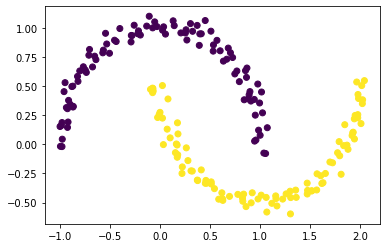

In [6]:
values, tags = make_moons(n_samples=200, noise=0.05)
x = values.T[0]
y = values.T[1]
plt.scatter(x, y, c=tags)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2, )))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.output_shape

In [7]:
model.summary()
loss_fn = keras.losses.BinaryCrossentropy()
model.compile(loss=loss_fn, optimizer="adam", metrics="accuracy")
history=model.fit(values, tags, epochs=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.4500
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 0.7268 - accuracy: 0.3850
Epoch 3/200
7/7 [=========================

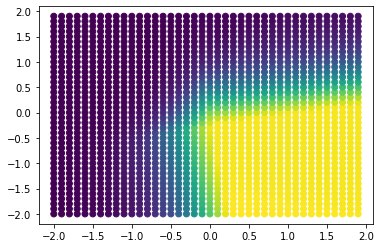

In [8]:
def make_grid(step):
    result = []
    for i in range(-200, 200, step*10):
        for j in range(-200, 200, step*10):
            result.append([i/100, j/100])
    return result

test = np.array(make_grid(1))
output= model.predict(test)

plt.scatter(test.T[0],test.T[1], c=output)